<a href="https://colab.research.google.com/github/mrlupher/Syllabus/blob/master/plot_stl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting stl files in Python


##Imports


In [1]:
!pip install numpy-stl
!pip install pandas
import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import pandas as pd



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


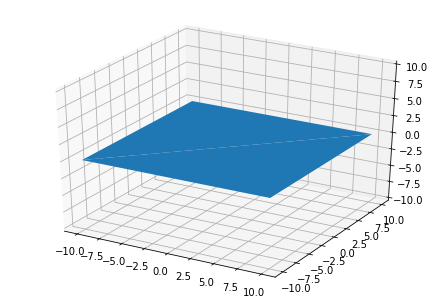

In [15]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('plane.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))
# Auto scale to the mesh size
# flatten turns into 1d array
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()



##Show vectors of triangles

In [19]:
print(your_mesh.vectors)

[[[-10. -10.   0.]
  [ 10. -10.   0.]
  [ 10.  10.   0.]]

 [[-10. -10.   0.]
  [ 10.  10.   0.]
  [-10.  10.   0.]]]


##Calculate the area of a triangle
###Area=|​x1​(y2​−y3​)+x2​(y3​−y1​)+x3​(y1​−y2​)|/2
∣​​

In [18]:
totalArea=0.0
tri=your_mesh.vectors
print(f'Total Triangles: {len(tri)}')

for j in range(len(tri)):
  x=(tri[j,:,0])
  y=(tri[j,:,1]) 
  
  print(f"arrays for x{j}:")
  print(x)
  print(f"arrays for y{j}:")
  print(y)
  i=0
  print(f'x{i}={x[i]} y{i}={y[i]} x{i+1}={x[i+1]} y{i+1}={y[i+1]} x{i+2}={x[i+2]} y{i+2}={y[i+2]}')
  area=abs(x[i]*(y[i+1]-y[i+2])+x[i+1]*(y[i+2]-y[i])+x[i+2]*(y[i]-y[i+1]))/2
  #area=(x[i]*(y[i+1]-y[i+2])+x[i+1]*(y[i+2]-y[i-1])+x[i+2]*(y[i]-y[i+1]))/2
  print(f'Area of Triangle{j}={area}')
  totalArea=totalArea+abs(area)
  print(f'Area subtotal:{totalArea}')
print('-'*50)
print(f'Total Area: {totalArea}')


Total Triangles: 2
arrays for x0:
[-10.  10.  10.]
arrays for y0:
[-10. -10.  10.]
x0=-10.0 y0=-10.0 x1=10.0 y1=-10.0 x2=10.0 y2=10.0
Area of Triangle0=200.0
Area subtotal:200.0
arrays for x1:
[-10.  10. -10.]
arrays for y1:
[-10.  10.  10.]
x0=-10.0 y0=-10.0 x1=10.0 y1=10.0 x2=-10.0 y2=10.0
Area of Triangle1=200.0
Area subtotal:400.0
--------------------------------------------------
Total Area: 400.0


## Display mesh points as a dataframe



In [ ]:
# shape shows current shape of data
#print(your_mesh.points.shape)
#print(your_mesh.points)
# reshape 2d: reshape(arrays, elements)
# reshape 3d: reshape(arrays,contained array,elements
# -1 for one unknown

points = your_mesh.points.reshape([-1,3])

#newpoints = points + 2
#print(newpoints)
df=pd.DataFrame([[d] for d in points], columns=['xyzcoord'])

df

In [ ]:
# new df from the column of lists
split_df = pd.DataFrame(df['xyzcoord'].tolist(), columns=['x', 'y', 'z'])
# display the resulting df
split_df

In [ ]:
#loc shortcut to display only columns x and z
split_2d =split_df[['x','y']]
split_2d

In [ ]:

# Changing data and saving to stl file
your_mesh.rotate(np.array([1.-1.1])), np.deg2rad(30)
your_mesh.save('new_plane1.stl')



### Computing Centroids

In [ ]:
stl_centroids= your_mesh.centroids
print(stl_centroids)

[[21.666666   8.733333  60.       ]
 [16.666666   7.0666656 60.       ]
 [11.666667   2.066666  60.       ]
 [28.333334   2.0666661 60.       ]
 [26.666666  -2.9333334 60.       ]
 [13.333333  -2.9333334 60.       ]
 [23.333334  -6.2666664 60.       ]
 [18.333334  -7.933333  60.       ]]
